In [17]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive
pd.set_option('max_colwidth', 400)

In [4]:
# Read the data into a Pandas DataFrame
chronic_disease_df = pd.read_csv('../Resources/U.S._Chronic_Disease_Indicators 2.csv')
chronic_disease_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD 12.00,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN


In [5]:
chronic_disease_df.info

<bound method DataFrame.info of         YearStart  YearEnd LocationAbbr    LocationDesc DataSource  \
0            2019     2019           AR        Arkansas      BRFSS   
1            2019     2019           ID           Idaho      BRFSS   
2            2019     2019           IN         Indiana      YRBSS   
3            2019     2019           IA            Iowa       NVSS   
4            2019     2019           IA            Iowa      BRFSS   
...           ...      ...          ...             ...        ...   
309210       2022     2022           VI  Virgin Islands      BRFSS   
309211       2022     2022           WV   West Virginia      BRFSS   
309212       2022     2022           WI       Wisconsin      BRFSS   
309213       2022     2022           VT         Vermont      BRFSS   
309214       2022     2022           WA      Washington      BRFSS   

                                        Topic  \
0                                    Diabetes   
1                            

In [6]:
chronic_disease_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [7]:
chronic_disease_df.rename(columns={
    'YearStart': 'year_started',
    'YearEnd': 'year_ended',
    'LocationAbbr': 'state_abbr',
    'LocationDesc': 'state'}, inplace=True)

chronic_disease_df

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD 12.00,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309210,2022,2022,VI,Virgin Islands,BRFSS,Tobacco,Quit attempts in the past year among adult current smokers,NaN,%,Age-adjusted Prevalence,...,TOB,TOB06,NaN,AGEADJPREV,RACE,AIAN,NaN,NaN,NaN,NaN
309211,2022,2022,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease among adults,NaN,%,Crude Prevalence,...,COPD,COPD01,NaN,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
309212,2022,2022,WI,Wisconsin,BRFSS,Immunization,Pneumococcal vaccination among adults aged 65 years and older,NaN,%,Crude Prevalence,...,IMM,IMM04,NaN,CRDPREV,RACE,BLK,NaN,NaN,NaN,NaN
309213,2022,2022,VT,Vermont,BRFSS,Social Determinants of Health,Lack of health insurance among adults aged 18-64 years,NaN,%,Crude Prevalence,...,SDOH,SDH09,NaN,CRDPREV,RACE,HAPI,NaN,NaN,NaN,NaN


In [8]:
datasources = chronic_disease_df['DataSource'].unique()
print(datasources)

['BRFSS' 'YRBSS' 'NVSS' 'US Cancer DVT' 'NSCH' 'CMS Part A Claims Data'
 'ACS' 'PRAMS' 'USRDS' 'AEDS' 'NIS' 'ANRF'
 'Current Population Survey - FSS'
 'WIC Participant and Program Characteristics']


In [9]:
chronic_disease_df.columns

Index(['year_started', 'year_ended', 'state_abbr', 'state', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [10]:
heatmap_df = chronic_disease_df[[
    'year_started', 
    'year_ended', 
    'state_abbr', 
    'state', 
    'DataSource',
    'Topic'
]]

heatmap_df

,year_started,year_ended,state_abbr,state,DataSource,Topic
0,2019,2019,AR,Arkansas,BRFSS,Diabetes
1,2019,2019,ID,Idaho,BRFSS,Diabetes
2,2019,2019,IN,Indiana,YRBSS,Sleep
3,2019,2019,IA,Iowa,NVSS,Asthma
4,2019,2019,IA,Iowa,BRFSS,Asthma
...,...,...,...,...,...,...
309210,2022,2022,VI,Virgin Islands,BRFSS,Tobacco
309211,2022,2022,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease
309212,2022,2022,WI,Wisconsin,BRFSS,Immunization
309213,2022,2022,VT,Vermont,BRFSS,Social Determinants of Health


In [11]:
topic_list = list(heatmap_df['Topic'].unique())
state_list = list(heatmap_df['state_abbr'].unique())

 Select a topic from: ['Diabetes', 'Sleep', 'Asthma', 'Health Status', 'Mental Health', 'Alcohol', 'Arthritis', 'Tobacco', 'Disability', 'Immunization', 'Oral Health', 'Nutrition, Physical Activity, and Weight Status', 'Cancer', 'Cardiovascular Disease', 'Chronic Obstructive Pulmonary Disease', 'Cognitive Health and Caregiving', 'Social Determinants of Health', 'Maternal Health', 'Chronic Kidney Disease'] Alcohol
 Select a topic from: ['AR', 'ID', 'IN', 'IA', 'KS', 'LA', 'MD', 'MI', 'MN', 'MS', 'MO', 'NE', 'NV', 'NH', 'NJ', 'NY', 'NC', 'ND', 'OK', 'OR', 'PR', 'RI', 'SD', 'TX', 'US', 'VT', 'VI', 'ME', 'NM', 'OH', 'PA', 'TN', 'UT', 'VA', 'WV', 'WI', 'WY', 'AL', 'CA', 'DE', 'FL', 'GA', 'GU', 'HI', 'CO', 'CT', 'IL', 'KY', 'AZ', 'MT', 'DC', 'AK', 'SC', 'WA', 'MA'] LA


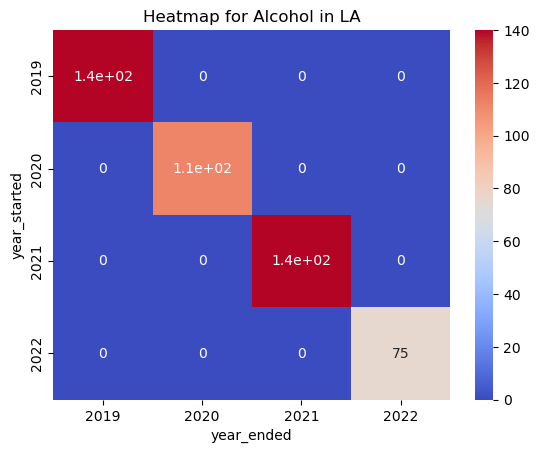

In [12]:
# Create a heatmap for a specific Topic and State
user_topic = input(f' Select a topic from: {topic_list}')
user_state = input(f' Select a topic from: {state_list}')
selected_topic = user_topic
selected_state = user_state
filtered_df = heatmap_df[(heatmap_df['Topic'] == selected_topic) & (heatmap_df['state_abbr'] == selected_state)]

plt.clf()  # Clear the current figure
if not filtered_df.empty:
    heatmap_data = filtered_df.pivot_table(index='year_started', columns='year_ended', values='DataSource', aggfunc='count', fill_value=0)
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
    plt.title(f'Heatmap for {selected_topic} in {selected_state}')
else:
    plt.text(0.5, 0.5, 'No data available for the selected Topic and State', horizontalalignment='center', 
             verticalalignment='center', fontsize=12)
    plt.axis('off')

plt.show()

In [13]:
#if widgets would work
# Create dropdowns for Topic and State
topic_dropdown = widgets.Dropdown(
    options=heatmap_df['Topic'].unique(),
    description='Topic:',
)

state_dropdown = widgets.Dropdown(
    options=heatmap_df['state_abbr'].unique(),
    description='State:',
)

# Function to update the heatmap based on dropdown selections
def update_heatmap(selected_topic, selected_state):
    filtered_df = heatmap_df[(heatmap_df['Topic'] == selected_topic) & (heatmap_df['state_abbr'] == selected_state)]
    
    plt.clf()  # Clear the current figure
    if not filtered_df.empty:
        heatmap_data = filtered_df.pivot_table(index='year_started', columns='year_ended', 
                                               values='DataSource', aggfunc='count', fill_value=0)
        sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for {selected_topic} in {selected_state}')
    else:
        plt.text(0.5, 0.5, 'No data available for the selected Topic and State', 
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
        plt.axis('off')
    
    plt.show()
    
# Create an interactive output
widgets.interactive(update_heatmap, selected_topic=topic_dropdown, selected_state=state_dropdown)

# Display the dropdowns
display(topic_dropdown, state_dropdown)

Dropdown(description='Topic:', options=('Diabetes', 'Sleep', 'Asthma', 'Health Status', 'Mental Health', 'Alco…

Dropdown(description='State:', options=('AR', 'ID', 'IN', 'IA', 'KS', 'LA', 'MD', 'MI', 'MN', 'MS', 'MO', 'NE'…

In [14]:
widgets.IntSlider()

IntSlider(value=0)

In [18]:
# Rename columns for consistency
chronic_disease_df.rename(columns={
    'YearStart': 'year_started',
    'YearEnd': 'year_ended',
    'LocationAbbr': 'state_abbr',
    'LocationDesc': 'state'
}, inplace=True)

# Create a smaller dataframe for the heatmap
heatmap_df2 = chronic_disease_df[[
    'year_started', 
    'year_ended', 
    'state_abbr', 
    'state', 
    'DataSource',
    'Topic'
]]

# Dropdown widgets for Topic and State
topic_dropdown = widgets.Dropdown(
    options=heatmap_df2['Topic'].unique(),
    description='Topic:',
)
# Dropping NaN and ensure uniqueness
state_dropdown = widgets.Dropdown(
    options=list(heatmap_df2['state_abbr'].dropna().unique()),  
    description='State:',
)


# Function to update the heatmap
def update_heatmap(selected_topic, selected_state):
    plt.figure(figsize=(10, 8)) 
    filtered_df = heatmap_df2[
        (heatmap_df2['Topic'] == selected_topic) & 
        (heatmap_df2['state_abbr'] == selected_state)
    ]
    
    if not filtered_df.empty:
        heatmap_data = filtered_df.pivot_table(
            index='year_started', 
            columns='year_ended', 
            values='DataSource', 
            aggfunc='count', 
            fill_value=0
        )
        sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
        plt.title(f'Heatmap for {selected_topic} in {selected_state}')
    else:
        plt.text(0.5, 0.5, 'No data available for the selected Topic and State', 
                 horizontalalignment='center', verticalalignment='center', fontsize=12)
        plt.axis('off')
    
    plt.show()

# Create an interactive widget
interactive_widget = interactive(
    update_heatmap, 
    selected_topic=topic_dropdown, 
    selected_state=state_dropdown
)

# Display the dropdowns and output area
display(interactive_widget)


interactive(children=(Dropdown(description='Topic:', options=('Diabetes', 'Sleep', 'Asthma', 'Health Status', …